In [1]:
import os
import numpy as np
from numba import njit,jit
import sys
from matplotlib import ticker
import matplotlib.pyplot as plt
from scipy.special import betainc, hyp2f1, gamma
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
font = {'size': 30, 'weight':'normal'}
plt.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "text.latex.preamble": r"\usepackage{amssymb}",
})
rng = np.random.default_rng(seed=42)
colors = [['blue',"slateblue"], ['darkgoldenrod', "goldenrod"], ['red', "indianred",], ['olivedrab', "yellowgreen"], ['plum',"pink"], ['black','dimgray'], ['orangered','coral'] ]

locminx = ticker.LogLocator(base=10.0,subs=np.linspace(0,1,11),numticks=12)
locmajx = ticker.LogLocator(base=10,numticks=12) 
locminy = ticker.LogLocator(base=10.0,subs=np.linspace(0,1,11),numticks=12)
locmajy = ticker.LogLocator(base=10,numticks=12) 
Ac = -3.16198

# FBM Splitting

## 0.3

0.03756741308487393


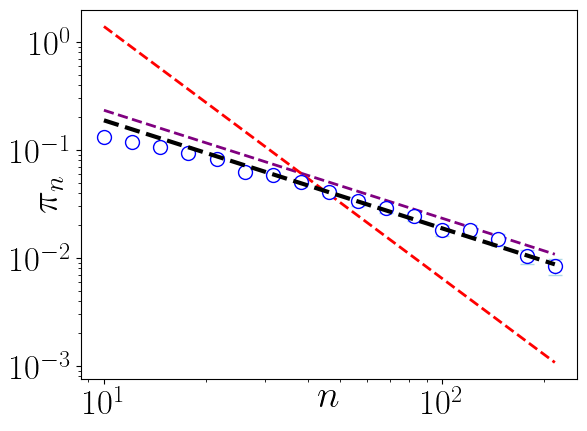

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
H = 0.3
epsilon = H-1/2
phi=1/H-1
ls = os.listdir('Splitting/FBM/0.3/')
listeN = np.logspace(1, 3, 25)
C = np.zeros(25)
P = np.zeros(25)

# Load data
for k in ls:
    A, B = np.load('Splitting/FBM/0.3/' + k)
    P += A
    C += B

# Filter data
Ind = (C > 10000) & ( (listeN>9) & (listeN<250) )
C, P, listeN = C[Ind], P[Ind], listeN[Ind]
# phi = 1.96704
# phi = 2.33333

# Create the plot
fig, ax = plt.subplots(1, 1)

# Plot data
ax.errorbar(listeN, P / C, 2 * np.sqrt(P / C * (1 - P / C)) / np.sqrt(C), fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
plt.plot(listeN, (np.exp(Ac*epsilon)) / listeN, '--k',linewidth=3,zorder=5)
plt.plot(listeN, phi/ listeN, '--', color='purple',linewidth=2)
plt.plot(listeN, 300 / listeN**(1 / H - 1), '--', color='red',linewidth=2)

print( np.abs(np.mean((P/C)*listeN) - (np.exp(Ac*epsilon)))/(np.exp(Ac*epsilon)))

# Set ticks and labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$", fontsize=28, labelpad=-30)
ax.set_ylabel("$\pi_n$", fontsize=28, labelpad=-40)
# ax.text(30, 0.2, rf'fBM, $H={H}$', fontsize=40)

# Set log scale
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)
# Save and show the plot
plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/FBMH03.pdf', dpi=600, bbox_inches='tight')
plt.show()
# plt.semilogx(listeN[5:], ((P/C - phi / listeN)[5:]),linewidth=2)
# plt.plot(listeN, (1+Ac*epsilon) / listeN, '--k')
plt.show()

## 0.4

[5805. 5805. 5805. 5805. 5805. 5805. 5805. 5805. 5805. 5805. 5805. 5805.
 5805. 5805. 5805. 5805. 5805. 5805. 5805. 5805.]
0.0685883898232793


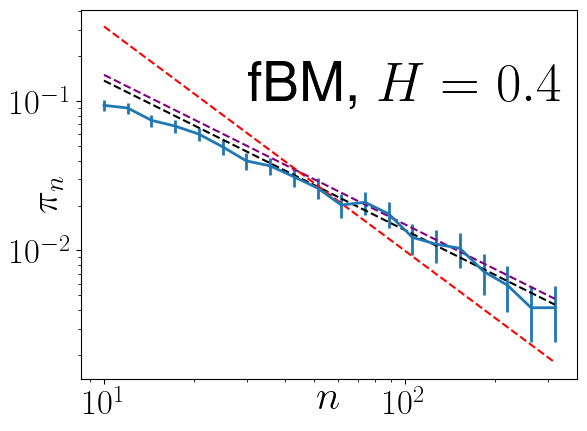

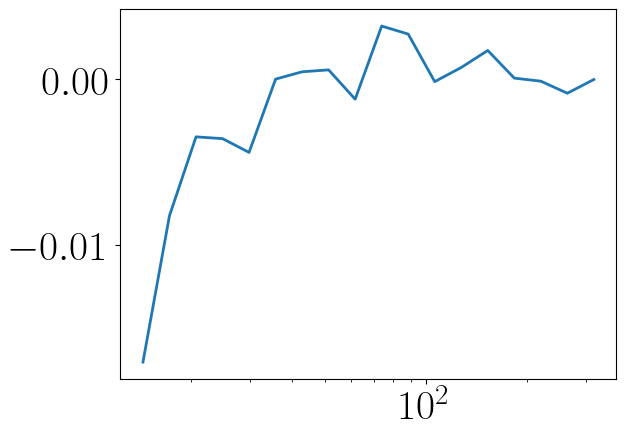

In [4]:
H=0.4
epsilon=H-1/2

ls=os.listdir('Splitting/FBM/0.4/')
listeN=np.logspace(1,2.5,20)
C=np.zeros(20)
P=np.zeros(20)
for k in ls:
    [A,B]=np.load('Splitting/FBM/0.4/'+k)
    P+=A
    C+=B
print(C)

Ind=C>3000
C,P,listeN=C[Ind],P[Ind],listeN[Ind]
phi = 1/H-1

fig, ax = plt.subplots(1,1)
print( np.abs(np.mean(P/C*listeN) - (np.exp(Ac*epsilon)))/(np.exp(Ac*epsilon)))

plt.errorbar(listeN,P/C,2*np.sqrt(P/C*(1-P/C))/np.sqrt(C),linewidth=2,elinewidth=2)
plt.plot(listeN, (np.exp(Ac*epsilon)) / listeN, '--k')
plt.plot(listeN, phi/ listeN, '--', color='purple')
plt.plot(listeN,10/listeN**(1/H-1),'--',color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='center')
ax.text(30,0.1,rf'fBM, $H={H}$',fontsize=40)
plt.semilogx()
plt.semilogy()
ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)
plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/FBMH04.pdf', dpi=600,bbox_inches='tight')
plt.show()

plt.semilogx(listeN[2:], (P/C - (1+Ac*epsilon) / listeN)[2:],linewidth=2)
# plt.plot(listeN, (1+Ac*epsilon) / listeN, '--k')
plt.show()

## 0.75

[28643. 28643. 28643. 28643. 28643. 28643. 28643. 28643. 28643. 28643.
 28643. 28643. 28643. 28643. 28643. 28643. 28643. 28643. 28643. 28643.
 28643. 28643. 28643. 28642. 28573.]
0.024864674278616165


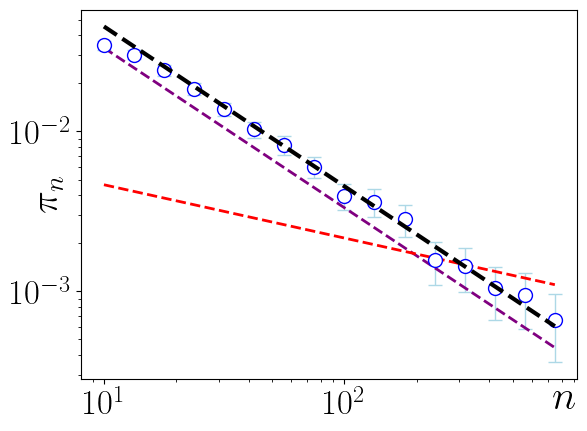

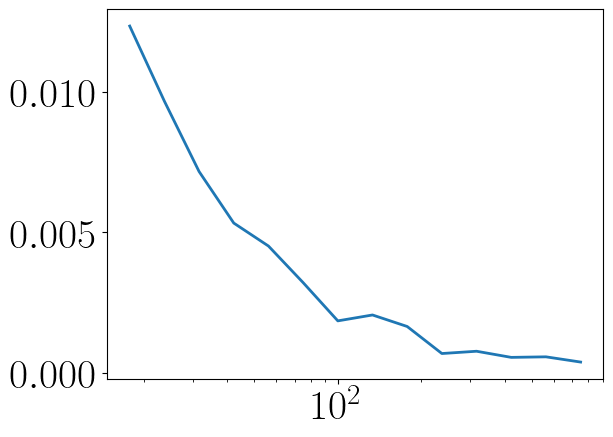

In [3]:
H=0.75
epsilon = H-1/2
Ac = -3.16198
ls=os.listdir('Splitting/FBM/0.75/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/FBM/0.75/'+k)
    P+=A
    C+=B
print(C)

listeN,C,P=listeN[:20],C[:20],P[:20]
Ind = (C > 10000) & ( (listeN>9) & (listeN<1000))
C, P, listeN = C[Ind], P[Ind], listeN[Ind]

phi=1/H-1

fig, ax = plt.subplots(1,1)
print( np.abs(np.mean(P/C*listeN) - (np.exp(Ac*epsilon)))/(np.exp(Ac*epsilon)))

plt.errorbar(listeN, P / C, 2 * np.sqrt(P / C * (1 - P / C)) / np.sqrt(C), fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
plt.plot(listeN, (np.exp(Ac*epsilon)) / listeN, '--k',linewidth=3,zorder=5)
plt.plot(listeN, phi/ listeN, '--', color='purple',linewidth=2)
plt.plot(listeN,0.01/listeN**(1/H-1),'--',color='red',linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='right')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40)
# ax.text(15,0.0005,rf'fBM, $H={H}$',fontsize=40)
plt.semilogx()
plt.semilogy()
ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)
plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/FBMH075.pdf', dpi=600,bbox_inches='tight')
plt.show()

plt.semilogx(listeN[2:], (P/C - (1+Ac*epsilon) / listeN)[2:],linewidth=2)
# plt.plot(listeN, (1+Ac*epsilon) / listeN, '--k')
plt.show()

## H=0.6

In [40]:
H=0.6
phi=(1-H)/H
epsilon=H-1/2

listeN = np.array([20,40,60,80])
plist = []
errplist = []
for n in listeN:

    ls=os.listdir('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Donnees Leo/phi_z_n/Splitting_x0_n/FBM/0.6/'+str(n)+'/')

    X0=[] 

    C=0
    for k in ls:
        X=np.load('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Donnees Leo/phi_z_n/Splitting_x0_n/FBM/0.6/'+str(n)+'/'+k,allow_pickle=True)
        
        C+=len(X)
        for x in X:
            if x[1]>=0:
                X0.append(x)
    print(X0)
    P = np.sum(X0,axis=0)[1]
    p = P/C
    
    plist.append(p)
   
    errplist.append(2*np.sqrt(p*(1-p)/C+1/C**2))

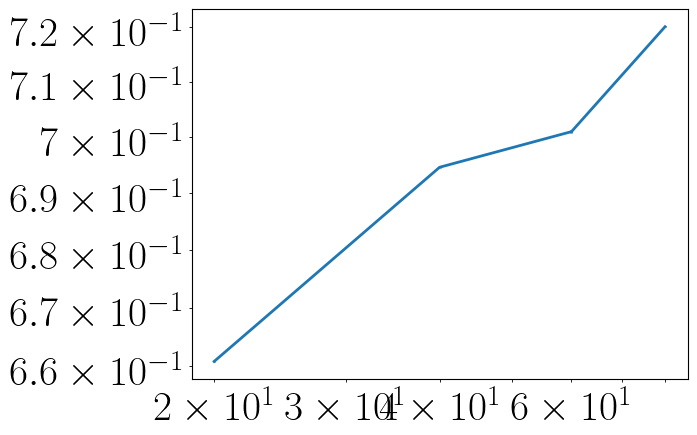

In [39]:
H=0.6
phi=(1-H)/H
epsilon=H-1/2

plt.errorbar(listeN,plist,errplist,linewidth=2,elinewidth=2)
plt.semilogx()
plt.semilogy()
plt.plot(listeN, (1+Ac*epsilon) / listeN, '--k')
plt.plot(listeN, phi/ listeN, '--', color='purple')
plt.show()

# Lévy Walk

## $\beta=3$

[20000. 20000. 20000. 20000. 20000. 20000. 20000. 20000. 20000. 20000.
 20000. 20000. 20000. 20000. 20000. 20000. 20000. 20000. 20000. 20000.
 20000. 20000. 20000. 20000. 20000.]


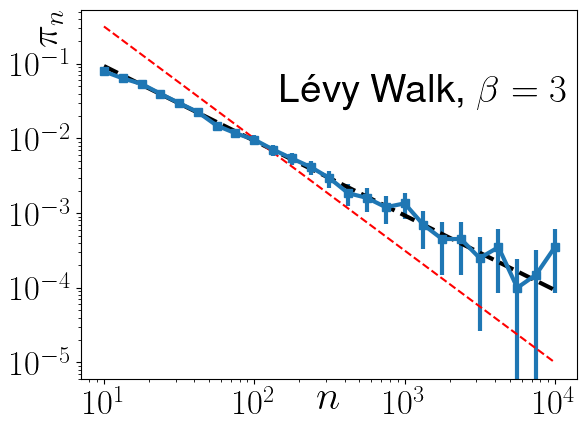

In [11]:
beta=3
phi = beta/2

ls=os.listdir('Splitting/LevyWalk/3/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/LevyWalk/3/'+k,allow_pickle=True)
    P+=A
    C+=B
print(C)
phi = P[P.size//2]/C[P.size//2] * listeN[P.size//2] # good scalar for the fit

fig, ax = plt.subplots(1,1)

plt.errorbar(listeN, P / C, 2 * np.sqrt(P / C * (1 - P / C)) / np.sqrt(C), linewidth=3,marker='s')
plt.plot(listeN, phi / listeN, '--k',linewidth=3)
plt.plot(listeN,10/listeN**(beta/2),'--',color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='top')
ax.text(150,0.03,rf'Lévy Walk, $\beta=3$',fontsize=28)
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/LevyWalk3.pdf', dpi=600,bbox_inches='tight')
plt.show()

## $\beta=1.5$

[240000. 240000. 240000. 240000. 240000. 240000. 240000. 240000. 240000.
 240000. 240000. 240000. 240000. 240000. 240000. 240000. 240000. 240000.
 240000. 240000. 240000. 240000. 240000. 240000. 240000.]


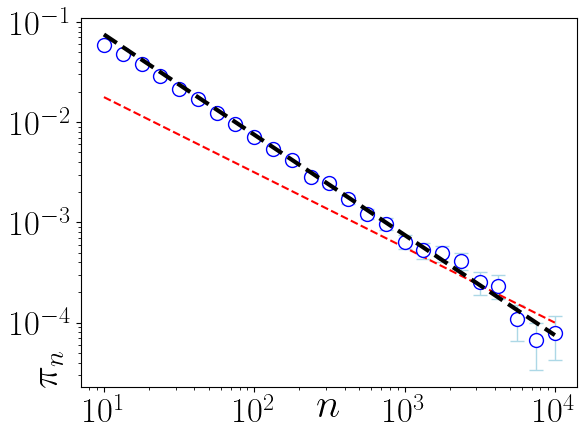

In [10]:
beta=1.5
phi = 1.5/2

ls=os.listdir('Splitting/LevyWalk/1.5/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/LevyWalk/1.5/'+k,allow_pickle=True)
    P+=A
    C+=B
print(C)
fig, ax = plt.subplots(1,1)

plt.errorbar(listeN, P / C, 2 * np.sqrt(P / C * (1 - P / C)) / np.sqrt(C), fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
plt.plot(listeN, phi / listeN, '--k',linewidth=3,zorder=5)
plt.plot(listeN,.1/listeN**(beta/2),'--',color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='bottom')
# ax.text(10,0.0001,rf'Lévy, $\beta=1.5$',fontsize=40)
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/LevyWalk1.5.pdf', dpi=600,bbox_inches='tight')
plt.show()

## $\beta=0.5$

[459. 382. 275. 207. 176. 122. 104.  64.  52.  39.  25.  21.  18.   7.
   8.   2.   6.   3.   0.   0.   2.   0.   0.   0.   0.]


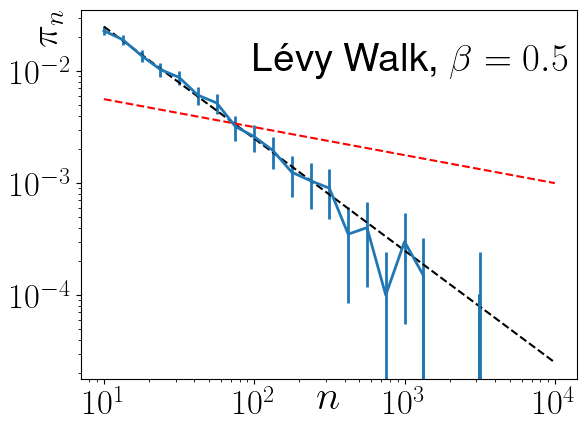

In [117]:
beta=0.5
phi = beta/2

ls=os.listdir('Splitting/LevyWalk/0.5/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/LevyWalk/0.5/'+k,allow_pickle=True)
    P+=A
    C+=B
print(P)
fig, ax = plt.subplots(1,1)

plt.errorbar(listeN,P/C,2*np.sqrt(P/C*(1-P/C))/np.sqrt(C),linewidth=2,elinewidth=2)
plt.plot(listeN,1/listeN*phi,'--k')
plt.plot(listeN,0.01/listeN**(beta/2),'--',color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='top')
ax.text(100,0.01,rf'Lévy Walk, $\beta=0.5$',fontsize=28)
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/LevyWalk0.5.pdf', dpi=600,bbox_inches='tight')
plt.show()

# TSAW
w(n)=exp(-n)

0.04435154852205223


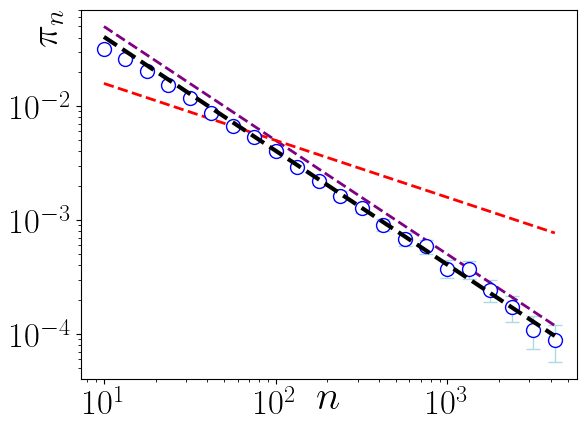

In [13]:
phi=4/np.pi**2 # theoretical value

ls=os.listdir('Splitting/TSAW/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/TSAW/'+k,allow_pickle=True)
    P+=A
    C+=B
fig, ax = plt.subplots(1,1)

ind = listeN<5e3
listeN=listeN[ind]
P=P[ind]
C=C[ind]

plt.errorbar(listeN,P/C,2*np.sqrt(P/C*(1-P/C))/np.sqrt(C), fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
plt.plot(listeN,1/listeN*phi,'--k',linewidth=3,zorder=5)
plt.plot(listeN,1/listeN/2,'--',color='purple',linewidth=2)
plt.plot(listeN,0.05/listeN**(1/2),'--',color='red',linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='top')
# ax.text(100,0.01,rf'TSAW',fontsize=40)
plt.semilogx()
plt.semilogy()
print( np.abs(np.mean(P/C*listeN) - 4/np.pi**2)/(4/np.pi**2))

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/TSAW.pdf', dpi=600,bbox_inches='tight')
plt.show()

# PSRW

w(n)=1/(1+n)

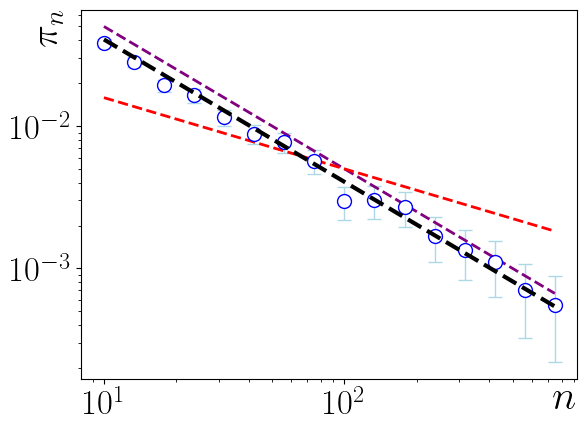

In [14]:
phi=4/np.pi**2

ls=os.listdir('Splitting/PSRW/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/PSRW/'+k)
    P+=A
    C+=B
fig, ax = plt.subplots(1,1)
ind = listeN<1e3
listeN=listeN[ind]
P=P[ind]
C=C[ind]

plt.errorbar(listeN,P/C,2*np.sqrt(P/C*(1-P/C))/np.sqrt(C), fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
plt.plot(listeN,1/listeN*phi,'--k',linewidth=3,zorder=5)
plt.plot(listeN,1/listeN/2,'--',color='purple',linewidth=2)
plt.plot(listeN,0.05/listeN**(1/2),'--',color='red',linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='right')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='top')
# ax.text(100,0.01,rf'PSRW',fontsize=40)
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/PSRW.pdf', dpi=600,bbox_inches='tight')
plt.show()

# RAP

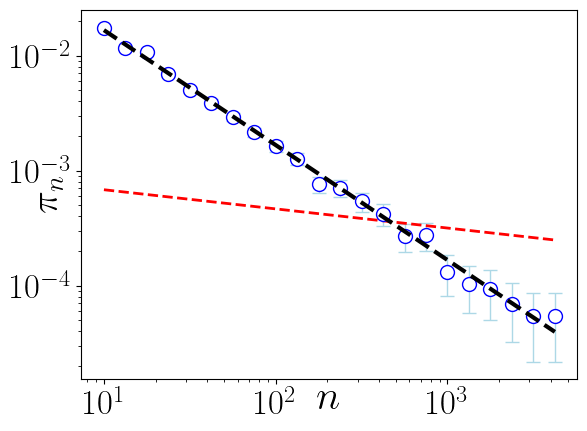

In [15]:
phi=1/6

ls=os.listdir('Splitting/RAP/')
listeN=np.logspace(1,4,25)
C=np.zeros(25)
P=np.zeros(25)
for k in ls:
    [A,B]=np.load('Splitting/RAP/'+k,allow_pickle=True)
    P+=A
    C+=B
fig, ax = plt.subplots(1,1)

ind = listeN<5e3
listeN=listeN[ind]
P=P[ind]
C=C[ind]

plt.errorbar(listeN,P/C,2*np.sqrt(P/C*(1-P/C))/np.sqrt(C), fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
plt.plot(listeN,1/listeN*phi,'--k',linewidth=3,zorder=5)
plt.plot(listeN,0.001/listeN**(1/6),'--',color='red',linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='center')
# ax.text(100,0.005,rf'RAP',fontsize=40)
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/RAP.pdf', dpi=600,bbox_inches='tight')
plt.show()

## SATW

In [2]:
phi=1/3
n_values = np.array([5,10,20,50,75,150,300])
ls=os.listdir('Splitting/SATW/')
pi = []

for n in n_values:
    pin = []
    num_n = 0
    for k in ls:
        if k.startswith(f"pin-satw-phi{phi}-n{n}-"):
            X=np.load('Splitting/SATW/'+k)
            for x in X:
                if x[-1] * x[-2] < 0:
                    pin.append(1)
                else:
                    pin.append(0)
    pi.append(pin)

In [3]:
pim = np.zeros(len(pi))
pistd = np.zeros(len(pi))
for i,x in enumerate(pi):
    pim[i] = np.mean(x)
    pistd[i] = np.std(x) / np.sqrt(len(x))

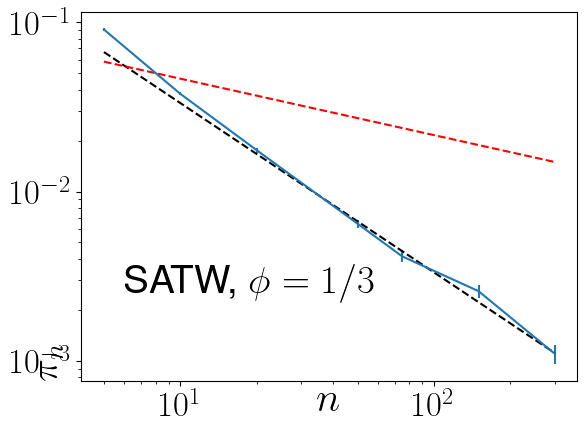

In [7]:
phi=1/3
fig, ax = plt.subplots(1,1)

plt.errorbar(n_values, pim, pistd)
plt.loglog(n_values,phi/n_values,'--k')
plt.plot(n_values,0.1/n_values**(phi),'--',color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("$n$",labelpad=-30,loc='center')
ax.set_ylabel("$\pi_n$", fontsize=28,labelpad=-40,loc='bottom')
ax.text(6,0.0025,rf'SATW, $\phi=1/3$',fontsize=28)
plt.semilogx()
plt.semilogy()

ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_major_locator(locmajx)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_major_locator(locmajy)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/SATWPHI1over3.pdf', dpi=600,bbox_inches='tight')
plt.show()

